<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Kernel_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kernel SVM

'''
When we cant seperate the classes with a straight line, the data is simply not **linearly seperable**.

For linearly sperable, SVM helps us to choose the optimal decison boundary.

But it is not possible in Non Linearly seperable.

###Mapping to Higher Dimension
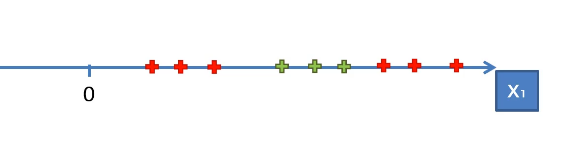

Step 2: Moving the axis
the function being 
```
f = x-5
```
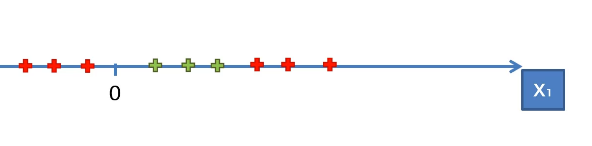

Squaring the function
```
f = (x-5)^2
```
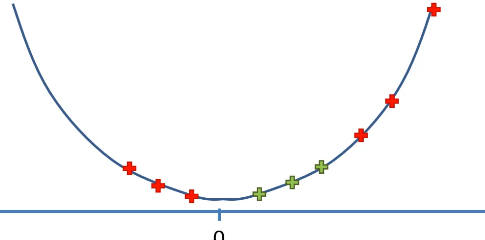

Now, we can linearly seperate them

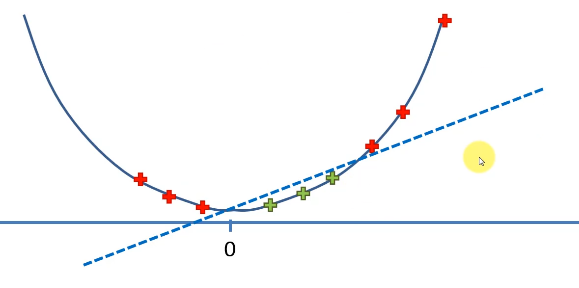

Basically if we map a function to a higher dimension then it will become linearly seperable.

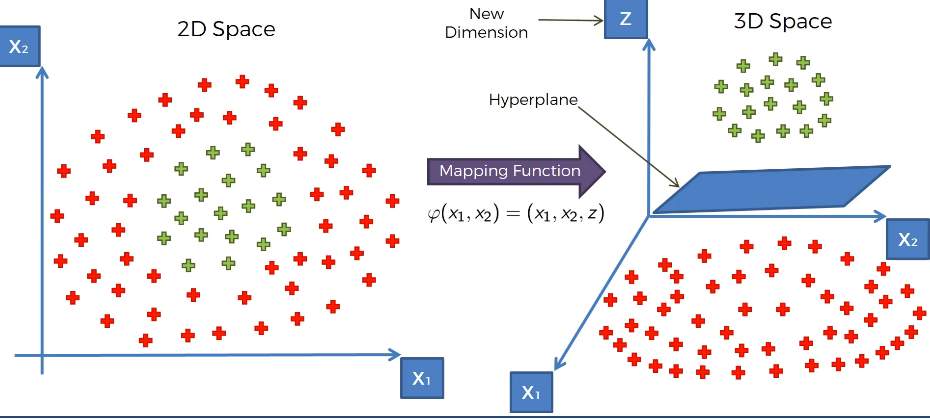

Then, we project it back to the lower dimensional plane.
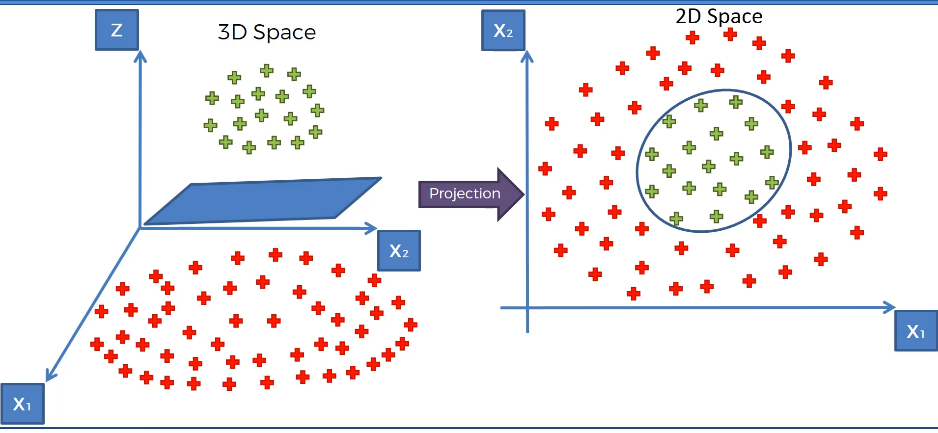


'''

###Types of Kernel Functions
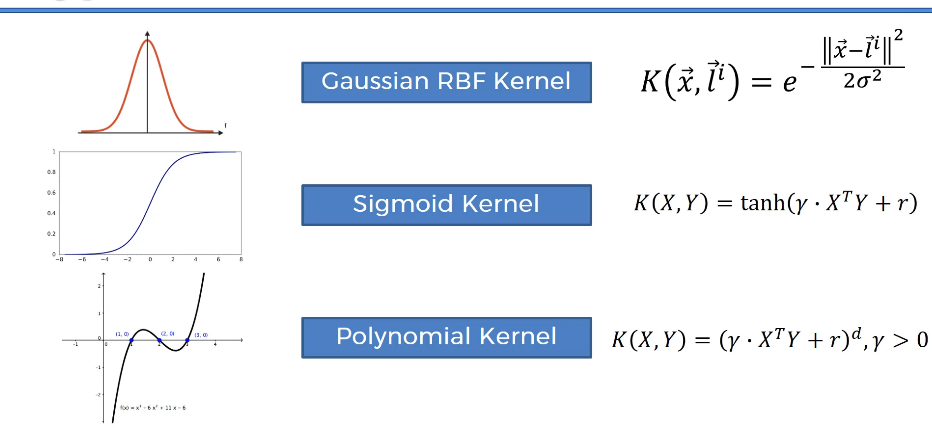

[Kernel Functions Read-up](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#:~:text=Kernel%20Functions%201%20Linear%20Kernel.%20Linear%20kernel%20documentation,radial%20basis%20function%20kernel.%20...%20More%20items...%20)

[Non-linear SVR short example](http://sigmaquality.pl/uncategorized/support-vector-regression-svr-using-linear-and-non-linear-kernels-en240120201439/)

Dont forget to refer to original course.

#Data Preprocessing

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Importing Dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#Splitting the Dataset into Training and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the Kernel SVM model on Training Dataset

In [5]:
from sklearn.svm import SVC
ksvm = SVC(kernel='rbf',random_state=0)
ksvm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#Predicting a new result

In [6]:
ksvm.predict(sc.transform([[30,87000]]))

array([0])

#Predicting the Test Set Results

In [8]:
pred = ksvm.predict(X_test)

#Evaluating the accuracy

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



[[55  3]
 [ 1 21]]


0.95


#Visualizing the Training Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


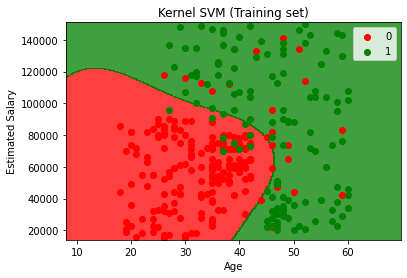

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, ksvm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


#Visualizing the Test Set Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


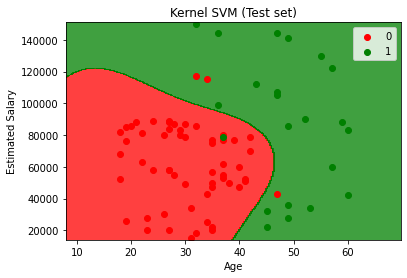

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, ksvm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
